In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## This is the excersize part

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, datasets

2025-10-08 16:11:05.613278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759939865.644265     659 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759939865.652889     659 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 3))
    plt.imshow(X[index])
    plt.title(y[index])

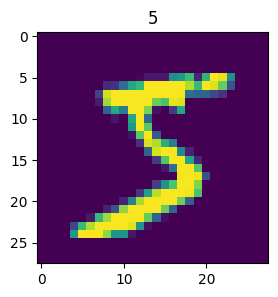

In [6]:
plot_sample(X_train, y_train, 0)

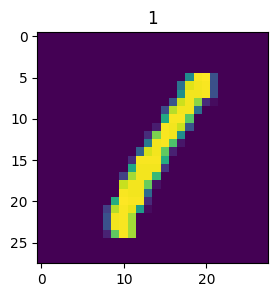

In [7]:
plot_sample(X_train, y_train, 3)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
from tensorflow import keras

model = keras.Sequential([
    # CNN layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1)),
    layers.MaxPool2D(2, 2),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(2, 2),

    # Dense layers
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=3)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-08 16:11:11.050792: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.8704 - loss: 0.4125
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9802 - loss: 0.0665
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9862 - loss: 0.0421


In [10]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9837 - loss: 0.0477


[0.03834758326411247, 0.9872999787330627]

In [12]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([3.5424927e-07, 2.9243728e-07, 2.5795394e-05, 2.3701861e-05,
       1.9070142e-06, 2.9330312e-07, 5.7066261e-12, 9.9994630e-01,
       7.8568782e-08, 1.2612098e-06], dtype=float32)

In [14]:
def check(index):
    print(np.argmax(y_pred[index]))
    plot_sample(X_test, y_test, index)

7


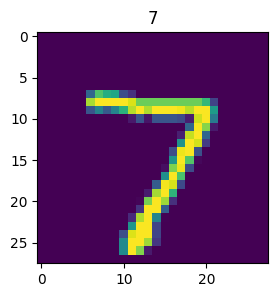

In [15]:
check(0)

9


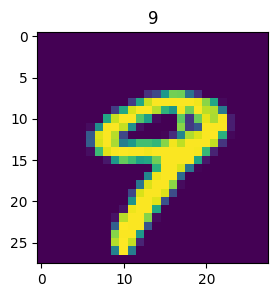

In [16]:
check(9)

3


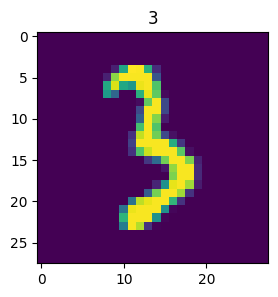

In [17]:
check(44)